# Exploring Relationships

## Question 1: Importations

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Set Path

path = r'C:\Users\calli\OneDrive\Desktop\School\Career Foundry\Data Immersion\Achievement 6.'

In [122]:
# Import Pickle File

df_1 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Housing_Income_Merged.pkl'))

## Question 2: Define variables suitable for exploratory visual analysis

### Ignore: city, state and prev_sold_date

### Analyze: bed, bath, acre_lot, house_size, price, average_income, and zip_code

In [123]:
# Create new dataframe with relevant columns

df_2 = df_1[['bed', 'bath', 'acre_lot', 'house_size', 'price', 'average_income', 'zip_code']]

### df_2 Checks

In [6]:
# Check matplotlib version (must not be 3.1.1)

matplotlib.__version__

'3.7.1'

In [124]:
# Show df shape

df_2.shape

(49968, 7)

In [125]:
# Show df head

df_2.head()

,bed,bath,acre_lot,house_size,price,average_income,zip_code
0,2,1,0.34,676,180000,50403.756548,1001
1,3,1,0.46,1196,239900,50403.756548,1001
2,3,3,0.45,2314,525000,50403.756548,1001
3,3,2,0.36,1276,289900,50403.756548,1001
4,4,2,0.11,1732,275000,50403.756548,1001


In [126]:
# Show data types

df_2.dtypes

bed                 int64
bath                int64
acre_lot          float64
house_size          int64
price               int64
average_income    float64
zip_code            int64
dtype: object

In [127]:
# Check for missing values

df_2.isnull().sum()

bed               0
bath              0
acre_lot          0
house_size        0
price             0
average_income    0
zip_code          0
dtype: int64

In [128]:
# Check for mix-type data

for col in df_2.columns.tolist():
      weird = (df_2[[col]].applymap(type) != df_2[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_2[weird]) > 0:
        print (col)

In [129]:
# Show statistics

df_2.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,bed,bath,acre_lot,house_size,price,average_income,zip_code
count,49968.00,49968.00,49968.00,49968.00,49968.00,49968.00,49968.00
mean,3.70,2.69,11.64,2345.38,776044.57,65485.99,8548.98
std,1.82,1.83,789.82,2772.76,1764649.72,45427.00,5272.42
min,1.00,1.00,0.00,122.00,500.00,27202.54,1001.00
25%,3.00,2.00,0.10,1320.00,279900.00,48484.94,5033.00
50%,3.00,2.00,0.23,1850.00,445000.00,52763.43,7739.00
75%,4.00,3.00,0.71,2700.00,749900.00,61984.57,10472.00
max,99.00,198.00,100000.00,400149.00,169000000.00,538901.90,19977.00


## Question 3: Correlation Matrix Heatmap

In [5]:
# Create a correlation matrix

df_2.corr()

,bed,bath,acre_lot,house_size,price,average_income,zip_code
bed,1.000000,0.681659,-0.006589,0.389679,0.245273,0.026831,-0.077753
bath,0.681659,1.000000,-0.003306,0.431422,0.413125,0.041354,-0.060114
acre_lot,-0.006589,-0.003306,1.000000,-0.001982,-0.000751,0.007044,-0.000945
house_size,0.389679,0.431422,-0.001982,1.000000,0.286924,0.041883,-0.063546
price,0.245273,0.413125,-0.000751,0.286924,1.000000,0.123739,-0.052626
average_income,0.026831,0.041354,0.007044,0.041883,0.123739,1.000000,0.047980
zip_code,-0.077753,-0.060114,-0.000945,-0.063546,-0.052626,0.047980,1.000000


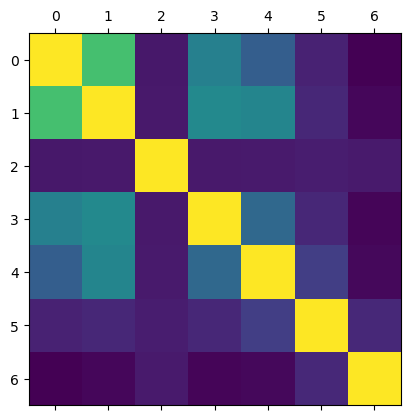

In [52]:
# Create a correlation heatmap

plt.matshow(df_2.corr())

In [130]:
# Rename df_2 to df

df = df_2

Text(0.5, 1.0, 'Correlation Matrix')

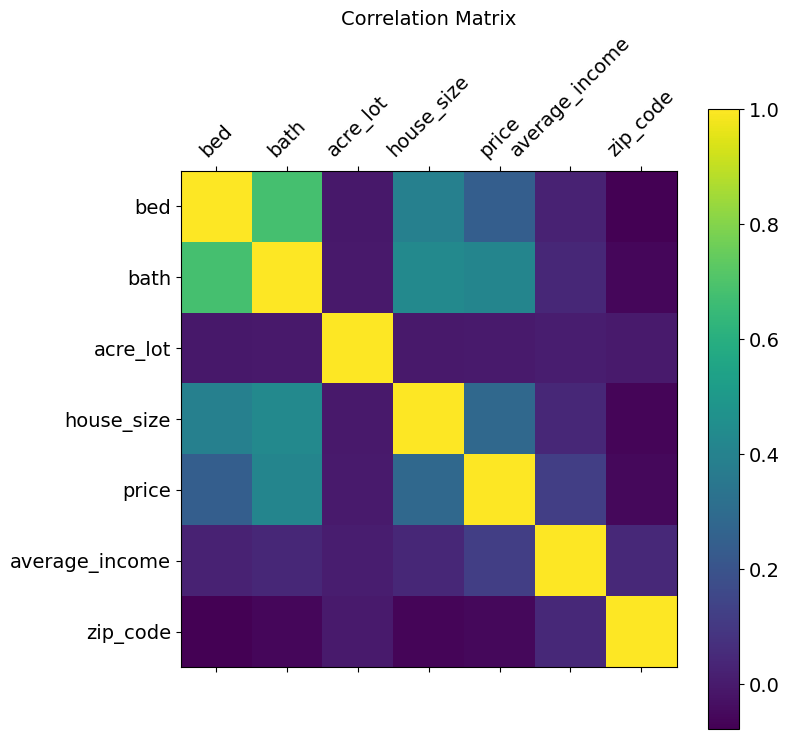

In [68]:
# Format heatmap

f = plt.figure(figsize=(8, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)

### Discuss what the coefficients in the plot mean in terms of the relationships between the variables

#### The acres, zip code, and average income have the least impact on the other variables. bed, bath, house size, and price have the strongest relationships to the other variables.

## Question 4: Scatterplots

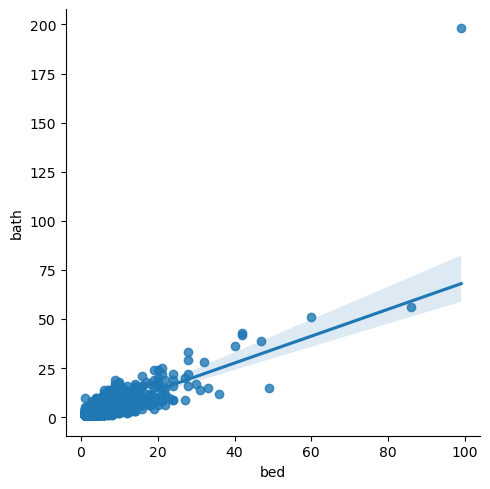

In [69]:
# Create a scatterplot of bed and bath

sns.lmplot(x = 'bed', y = 'bath', data = df)

### there is a srong positive relationship between the number of bedrooms and the number of bathrooms in a house

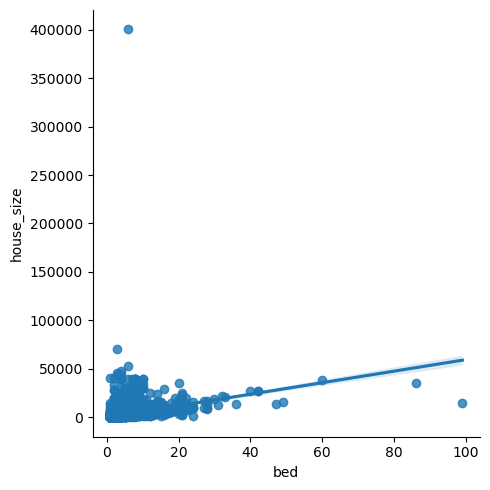

In [70]:
# Create a scatterplot of bed and house size

sns.lmplot(x = 'bed', y = 'house_size', data = df)

### There is a moderate positive relationship between number of bedrooms and house size

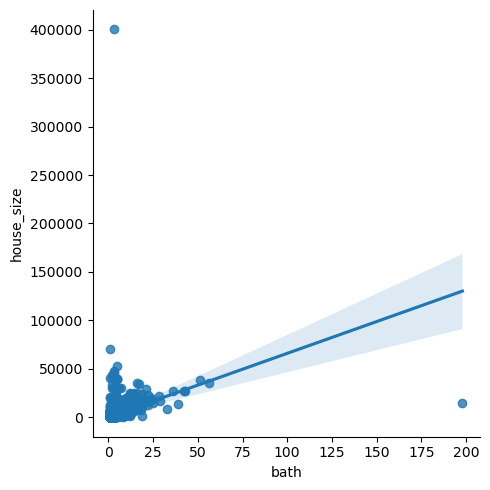

In [71]:
# Create a scatterplot of bath and house size

sns.lmplot(x = 'bath', y = 'house_size', data = df)

### There is a moderate positive relationship between number of bathrooms and house size

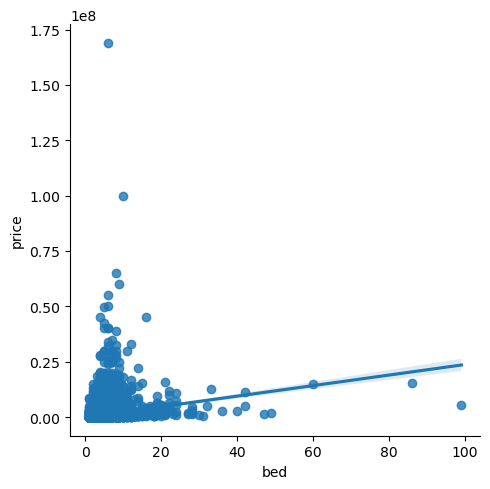

In [72]:
# Create a scatterplot of bed and price

sns.lmplot(x = 'bed', y = 'price', data = df)

### There is a weak positive relationship between number of bedrooms and price

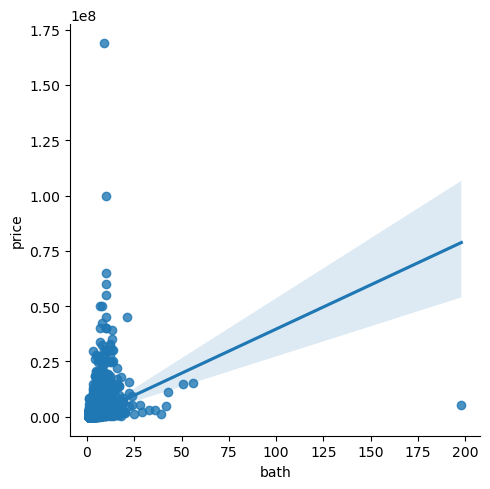

In [75]:
# Create a scatterplot of bath and price

sns.lmplot(x = 'bath', y = 'price', data = df)

### There is a moderate positive relationship between number of bathrooms and price

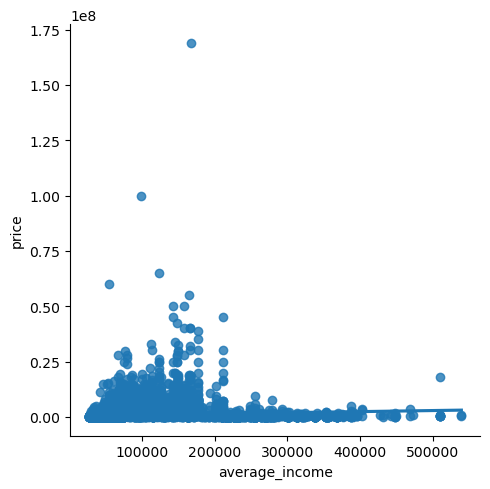

In [7]:
# Create a scatterplot of average income and price

sns.lmplot(x = 'average_income', y = 'price', data = df)

### There is a weak positive relationship between average income and price

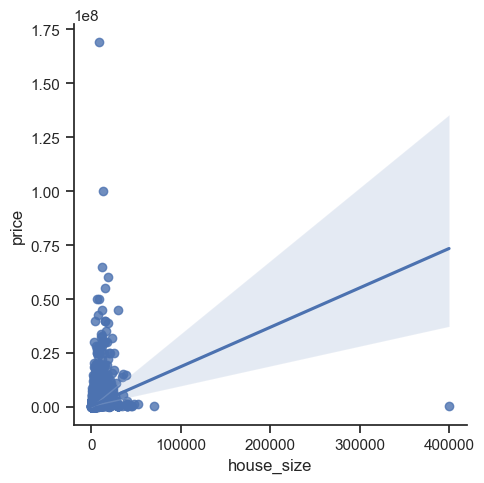

In [33]:
# Create a scatterplot of house_size and price

sns.lmplot(x = 'house_size', y = 'price', data = df)

### There is a weak positive relationship between house size and price

## Question 5: Pair Plot

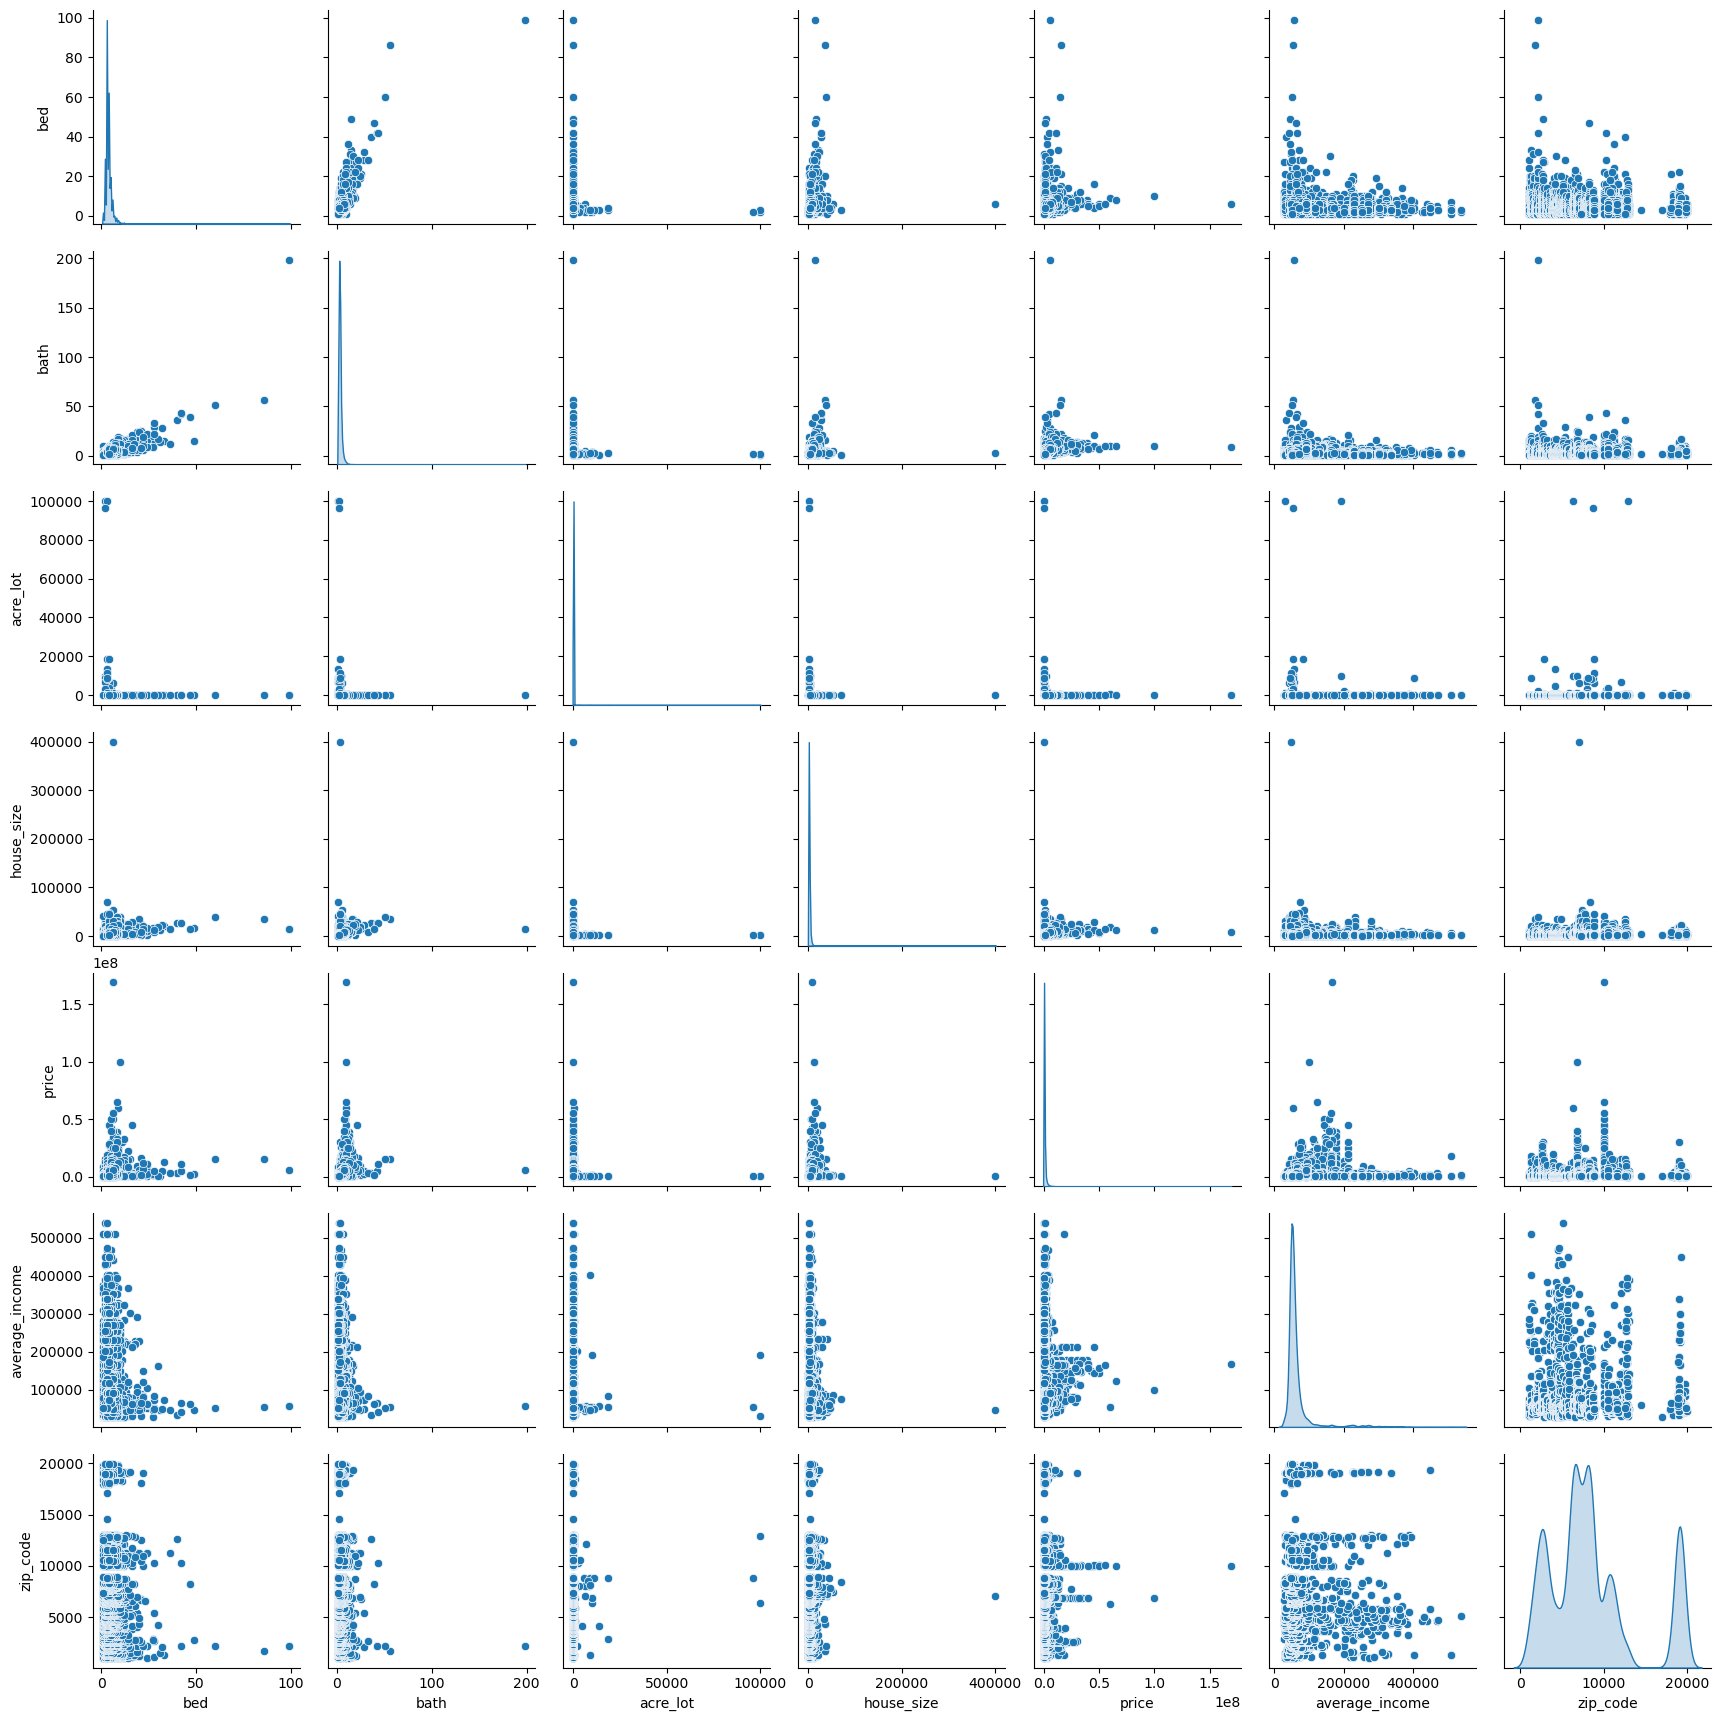

In [7]:
# Create a pair plot

plot_1 = sns.pairplot(df, diag_kind='kde')

### The strongest relationships are between the details of the houses themselves. Bed, bath, and size. I expected there to be a stronger relationship between price and average income, but while there is a correlation there, it's pretty weak. The price seems to be more closely connected to bed and bath count. Even so, I'd still like to get a closer look at the affordability of the listings by flagging income levels and looking at those in relation to price on a categorical plot.

### I may make additional categorical plots to visualize the distribution of bed, bath, and size, against price.

## Question 6: Categorical Plot

### Create Income Level Flags

<Axes: xlabel='average_income', ylabel='Count'>

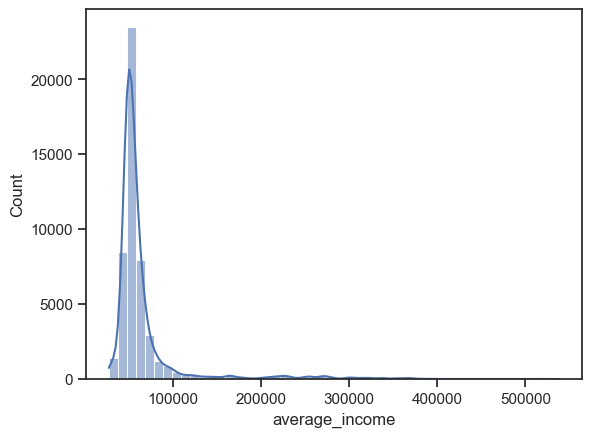

In [131]:
# Create histogram of average_income

sns.histplot(df_1['average_income'], bins =50, kde = True)

In [133]:
# Flag zip codes with average_income < $75,000 as "Low Income"
# Under new column "income_level"

df_1.loc[df_1['average_income'] < 65000, 'income_level'] = 'Low Income'

In [134]:
# Flag zip codes with average_income >= $75,000
# and < $85,000 as "Medium Income"
# Under new column "income_level"

df_1.loc[(df_1['average_income'] >= 65000) &
         (df_1['average_income'] < 90000), 'income_level'] = 'Middle Income'

In [135]:
# Flag zip codes with average_income >= $85,000 as "High Income"
# Under new column "income_level"

df_1.loc[df_1['average_income'] >= 90000, 'income_level'] = 'High Income'

In [136]:
# Show df head

df_1.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,average_income,income_level
0,2,1,0.34,Agawam,Massachusetts,1001,676,NaN,180000,50403.756548,Low Income
1,3,1,0.46,Agawam,Massachusetts,1001,1196,NaN,239900,50403.756548,Low Income
2,3,3,0.45,Agawam,Massachusetts,1001,2314,2014-06-25,525000,50403.756548,Low Income
3,3,2,0.36,Agawam,Massachusetts,1001,1276,2012-10-12,289900,50403.756548,Low Income
4,4,2,0.11,Agawam,Massachusetts,1001,1732,NaN,275000,50403.756548,Low Income


In [137]:
# Show income_level value counts

df_1['income_level'].value_counts(dropna = False)

income_level
Low Income       39461
Middle Income     6122
High Income       4385
Name: count, dtype: int64

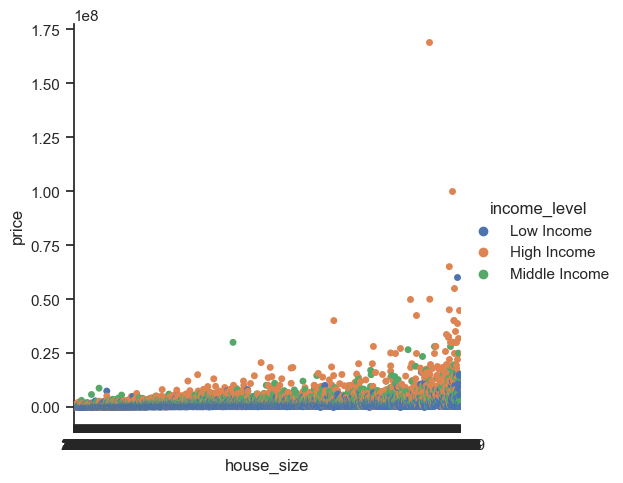

In [138]:
# Create a categorical plot of income_level and price per house_size

sns.set(style='ticks')
g = sns.catplot(x='house_size', y='price', hue='income_level', data=df_1)

#### Interperet the results: It seems that areas with higher incomes tend to have larger houses. While we've already established that the relationship between average income and price is rather weak, we also know that size is a mild contributer to listing price, though it still has less of an impact on price than bed and bath count do.

### Create bedroom count flags

<Axes: xlabel='price', ylabel='Count'>

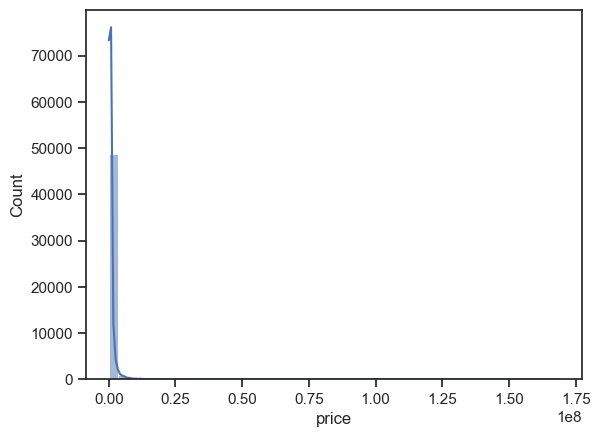

In [139]:
# Create histogram of price

sns.histplot(df_1['price'], bins =50, kde = True)

In [140]:
# Filter price higer than 3 million

df_filtered = df_1.query('price <= 3000000')

<Axes: xlabel='price', ylabel='Count'>

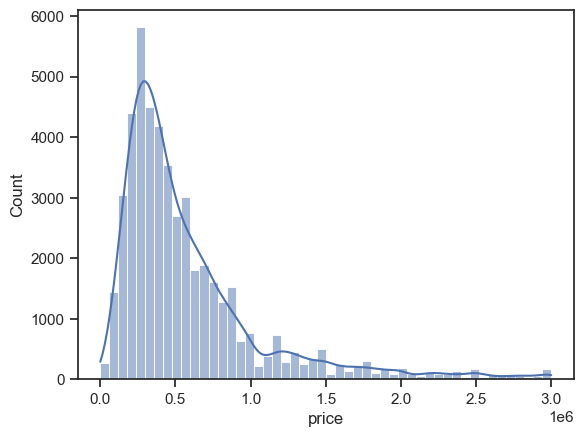

In [141]:
# Create new histogram of house_size with filtered data

sns.histplot(df_filtered['price'], bins=50, kde=True)

In [142]:
# Flag listings with price < $250,000 as "Low Cost"
# Under new column "price_category"

df_1.loc[df_1['price'] < 250000, 'price_category'] = 'Low Cost'

In [143]:
# Flag listings with price >= $250,000
# and < $625,000 as "Medium Cost"
# Under new column "price_category"

df_1.loc[(df_1['price'] >= 250000) &
         (df_1['price'] < 625000), 'price_category'] = 'Medium Cost'

In [144]:
# Flag listings with price >= $625,000
# and < $1,500,000 as "High Cost"
# Under new column "price_category"

df_1.loc[(df_1['price'] >= 625000) &
         (df_1['price'] < 1500000), 'price_category'] = 'High Cost'

In [145]:
# Flag listings with price >= $1,500,000 as "Luxury Cost"
# Under new column "price_category"

df_1.loc[df_1['price'] >= 1500000, 'price_category'] = 'Luxury Cost'

In [146]:
# Show df head

df_1.head()

,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,average_income,income_level,price_category
0,2,1,0.34,Agawam,Massachusetts,1001,676,NaN,180000,50403.756548,Low Income,Low Cost
1,3,1,0.46,Agawam,Massachusetts,1001,1196,NaN,239900,50403.756548,Low Income,Low Cost
2,3,3,0.45,Agawam,Massachusetts,1001,2314,2014-06-25,525000,50403.756548,Low Income,Medium Cost
3,3,2,0.36,Agawam,Massachusetts,1001,1276,2012-10-12,289900,50403.756548,Low Income,Medium Cost
4,4,2,0.11,Agawam,Massachusetts,1001,1732,NaN,275000,50403.756548,Low Income,Medium Cost


In [147]:
# Show price_category value counts

df_1['price_category'].value_counts(dropna = False)

price_category
Medium Cost    23307
High Cost      12203
Low Cost        9966
Luxury Cost     4492
Name: count, dtype: int64

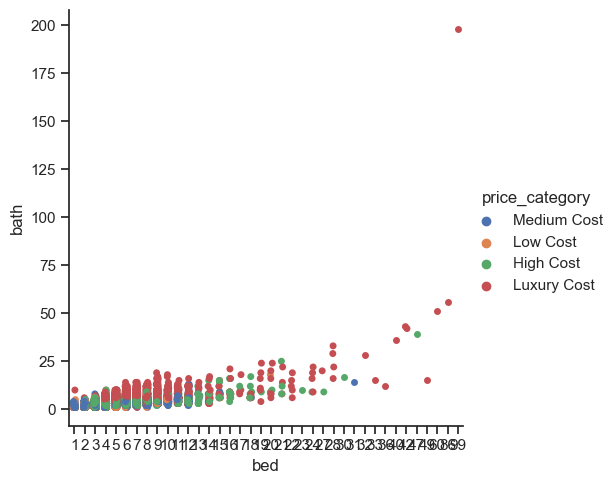

In [148]:
# Create a categorical plot of price_category, bed, and bath

sns.set(style='ticks')
i = sns.catplot(x='bed', y='bath', hue='price_category', data=df_1)

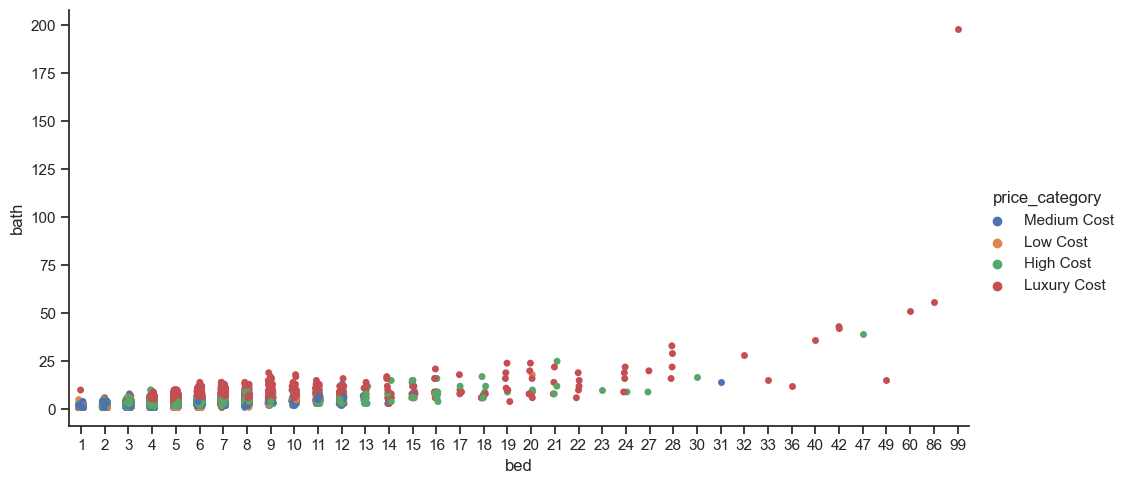

In [149]:
# Create a categorical plot of price_category, bed, and bath

sns.set(style='ticks')
h = sns.catplot(x='bed', y='bath', hue='price_category', data=df_1, aspect=2)

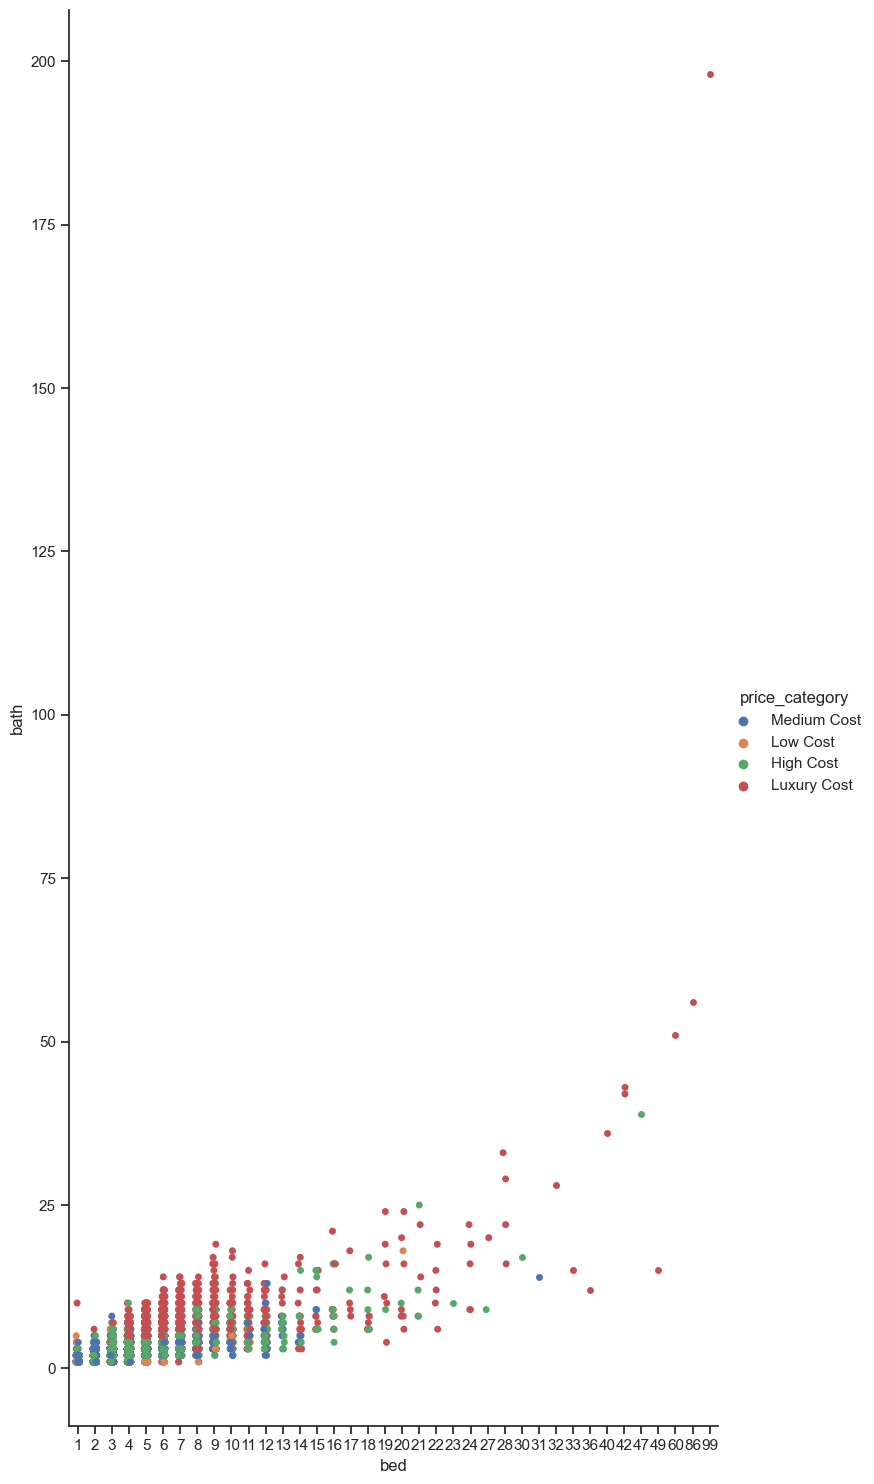

In [150]:
# Format categorical plot of price_category, bed, and bath

sns.set(style='ticks')
j = sns.catplot(x='bed', y='bath', hue='price_category',
                data=df_1, height=15, aspect=0.5)

In [151]:
# Filter bath > 75

df_filt = df_1.query('bath < 75')

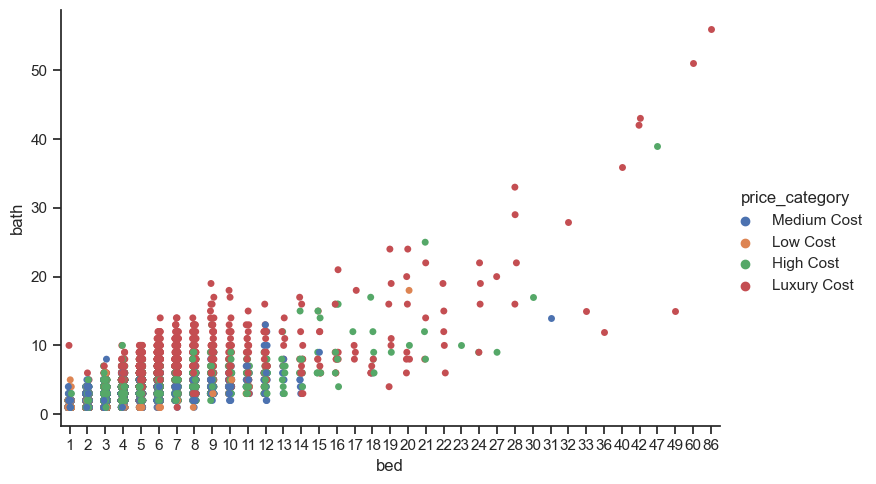

In [152]:
# Create formatted categorical plot of price_category, bed, and bath
# using filtered data

sns.set(style='ticks')
j = sns.catplot(x='bed', y='bath', hue='price_category',
                data=df_filt, height=5, aspect=1.5)

#### Interperet the results: The higher the bathroom count, the higher the cost. Bedroom count has an effect as well, but not as drastic of one. It seems homes with more bedrooms but fewer bathrooms will cost less than vise versa.

## Question 7: Answering questions from project summary

### - Is there a connection between income and the cost of housing?

#### Average income has very little affect on the cost of the listings.

### - How much does square footage and lot size affect listing price?

#### Square footage has a weak relationship with price while lot has no relationship with price.

### - How do bedroom and bath count affect square footage?

#### Both bed and bath have a moderate positive relationship with square footage.

### - Do lot size or square footage have a greater affect on listing price than the other?

#### square footage has a greater affect on price than lot size

## Question 7: Creating new questions

### - How can we tell if a home is affordable within the average income level?

### - How does bed and bath count vary by zip code?

## Question 8: Define hypotheses

### Homes with fewer bathrooms are more likely to be affordable within the average income level.

## Exportations

In [153]:
# Export df_1 as Housing_Income_Merged_2 as pickle file

df_1.to_pickle(os.path.join(path,
                            '02 Data',
                            'Prepared Data',
                            'Housing_Income_Merged_2.pkl'))